In [1]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.dummy import DummyRegressor # (baseline score)
from sklearn.model_selection import train_test_split, cross_val_score


pd.options.mode.chained_assignment = None  # default='warn'

import itertools as it
from sklearn.preprocessing import StandardScaler

In [2]:
# Read training dataset into df
df = pd.read_csv('./datasets/train.csv')

In [3]:
# View head
df.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900


In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
# Create a dictionary to rename columns
col_name_dict = {'Order':'id', 'PID':'pid', 'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning',
                 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area','Street':'street','Alley':'alley',
                 'Lot Shape':'lot_shape', 'Land Contour':'land_contour', 'Utilities':'utilities',
                 'Lot Config':'lot_config', 'Land Slope':'land_slope', 'Neighborhood':'neighborhood',
                 'Condition 1':'condition_1','Condition 2':'condition_2', 'Bldg Type':'building_type',
                 'House Style':'house_style', 'Overall Qual':'overall_quality','Overall Cond':'overall_condition',
                 'Year Built':'year_built', 'Year Remod/Add':'year_remodel_add', 'Roof Style':'roof_style',
                 'Roof Matl':'roof_material', 'Exterior 1st':'exterior_1', 'Exterior 2nd':'exterior_2',
                 'Mas Vnr Type':'masonry_type','Mas Vnr Area':'masonry_area', 'Exter Qual':'external_quality',
                 'Exter Cond':'external_condition', 'Foundation':'foundation', 'Bsmt Qual':'basement_quality',
                 'Bsmt Cond':'basement_condition', 'Bsmt Exposure':'basement_exposure',
                 'BsmtFin Type 1':'basement_fin_type_1', 'BsmtFin SF 1':'basement_fin_sf_1',
                 'BsmtFin Type 2':'basement_fin_type_2', 'BsmtFin SF 2':'basement_fin_sf_2',
                 'Bsmt Unf SF':'basement_unf_sf', 'Total Bsmt SF':'total_basement_sf','Heating':'heating',
                 'Heating QC':'heating_qc', 'Central Air':'central_air', 'Electrical':'electrical',
                 '1st Flr SF':'1st_floor_sf','2nd Flr SF':'2nd_floor_sf', 'Low Qual Fin SF':'low_quality_fin_sf',
                 'Gr Liv Area':'ground_living_area', 'Bsmt Full Bath':'basement_full_bath',
                 'Bsmt Half Bath':'basement_half_bath', 'Full Bath':'full_bath', 'Half Bath':'half_bath',
                 'Bedroom AbvGr':'bed_above_ground','Kitchen AbvGr':'kitchen_above_ground',
                 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground', 
                 'Functional':'functional','Fireplaces':'fireplace', 'Fireplace Qu':'fireplace_quality',
                 'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built','Garage Finish':'garage_fin',
                 'Garage Cars':'garage_cars', 'Garage Area':'garage_area', 'Garage Qual':'garage_quality',
                 'Garage Cond':'garage_condition', 'Paved Drive':'paved_drive', 'Wood Deck SF':'wood_deck_sf',
                 'Open Porch SF':'open_porch_df','Enclosed Porch':'enclosed_porch', '3Ssn Porch':'3ssn_porch',
                 'Screen Porch':'screen_porch', 'Pool Area':'pool_area', 'Pool QC':'pool_quality','Fence':'fence',
                 'Misc Feature':'misc_feature', 'Misc Val':'misc_value', 'Mo Sold':'month_sold',
                 'Yr Sold':'year_sold', 'Sale Type':'sale_type','SalePrice':'sale_price'}

In [7]:
# rename columns
df = df.rename(columns=col_name_dict)

In [8]:
df.shape

(2197, 82)

In [9]:
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_quality,fence,misc_feature,misc_value,month_sold,year_sold,sale_type,Sale Condition,sale_price
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [10]:
df['street'].value_counts()

Pave    2188
Grvl       9
Name: street, dtype: int64

In [11]:
# Grouping columns - consider using dictionary for this

# ID group probably won't be used
id_group = ['id', 'pid']
ms_group = ['ms_subclass', 'ms_zoning']

# Lot group - shape & area of land etc.
lot_group = ['lot_frontage', 'lot_area','lot_shape','lot_config']

# Location group - might help a little bit 
location_group = ['street', 'neighborhood','condition_1','condition_2']

# Land group - how slope the area is
land_group = ['land_contour','land_slope']

# Building group - different building types will cost differently
building_group = ['building_type','house_style','foundation']

# Overall group - overall condition might play a part in differentiating prices
overall_group = ['overall_quality','overall_condition']

# Year group - newer houses costs more this should be used
year_group = ['year_built','year_remodel_add']

# Exterior group - style of roofs, walls, etc - might only pick one
exterior_group = ['roof_style','roof_material','exterior_1','exterior_2','masonry_type','masonry_area',
                  'external_quality','external_condition']

# Basement group - could feature engineer to combine them all to 1-2 features
basement_group = ['basement_quality','basement_condition','basement_exposure','basement_fin_type_1',
                 'basement_fin_sf_1','basement_fin_sf_2','basement_fin_type_2','basement_unf_sf','total_basement_sf',
                 'basement_full_bath','basement_half_bath']

# Function group - some features might exist in more expensive houses e.g. central air
function_group = ['utilities','heating','heating_qc','central_air','electrical','functional','fireplace','fireplace_quality']

# Area group - feature engineer to combine total sf 
area_group = ['1st_floor_sf','2nd_floor_sf','ground_living_area']

# Baths - feature engineer to just bath
bath_group = ['full_bath','half_bath']

# Bed group - no. of bedrooms can leave as is
bed_group = ['bed_above_ground']

# Kitchen group - to explore
kitchen_group = ['kitchen_above_ground','kitchen_quality']

# Room group - probably can leave as is, more rooms should be more expensive
room_group = ['total_rooms_above_ground']

# Garage group - some garage types costs more than others
garage_group = ['garage_type','garage_year_built','garage_fin','garage_cars','garage_area','garage_quality',
                'garage_condition']

# Drive group - paved drive costs more, gotta check distribution
drive_group = ['paved_drive']

# This one can be dropped
unsure_group = ['low_quality_fin_sf']

# Porch group - can porbably select one or two eg. fence and something else
porch_group = ['wood_deck_sf', 'open_porch_df', 'enclosed_porch','3ssn_porch', 'screen_porch']

# Only a few houses have pools - might be better to leave out of the equation
pool_group = ['pool_area']

# Misc group - select one probably, or even leave out
misc_group = ['misc_value']

# Sold group - this one should be explored further, but year sold should play a part (maybe year built is better)
sold_group = ['month_sold', 'year_sold', 'sale_type']

# Target variable
target_var = ['sale_price']

In [12]:
# Create a list of column types
groups = [lot_group, location_group, land_group, building_group, overall_group, year_group, exterior_group,
         basement_group, function_group, area_group, bath_group, bed_group, kitchen_group, room_group,
         garage_group, drive_group, porch_group, pool_group, misc_group, sold_group]

In [13]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

pool_quality           0.994538
misc_feature           0.963587
alley                  0.934911
fence                  0.809285
fireplace_quality      0.485207
lot_frontage           0.164770
garage_condition       0.055530
garage_quality         0.055530
garage_fin             0.055530
garage_year_built      0.055530
garage_type            0.054620
basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_fin_type_1    0.030496
basement_quality       0.030496
basement_condition     0.030496
masonry_area           0.010014
masonry_type           0.010014
basement_half_bath     0.000455
basement_full_bath     0.000455
total_basement_sf      0.000455
basement_unf_sf        0.000455
garage_cars            0.000455
garage_area            0.000455
basement_fin_sf_2      0.000455
basement_fin_sf_1      0.000455
electrical             0.000455
dtype: float64

In [14]:
# Drop almost empty columns
df = df.drop(['pool_quality','alley','misc_feature','fence'], axis=1)

__Missing values findings:__

Mostly Empty - drop cols
- pool_quality mostly empty
- alley is mostly empty 
- misc_feature is mostly empty 
- fence is mostly empty 

Check
- fireplace_quality - check correlation with no fireplace

Check unit missing
- garage seems to be unit missing value
- basement seems to be unit missing value
- masonry seems to be unit missing value
- basement bath seems to be unit missing value

In [16]:
# Check 4 columns dropped from 81 to 77
df.shape

(2197, 78)

In [17]:
# Check fireplace quality
df[function_group].groupby(['fireplace','fireplace_quality'],dropna=False).count()

utilities  heating  heating_qc  central_air  \
fireplace fireplace_quality                                                
0         NaN                     1066     1066        1066         1066   
1         Ex                        27       27          27           27   
          Fa                        43       43          43           43   
          Gd                       472      472         472          472   
          Po                        33       33          33           33   
          TA                       382      382         382          382   
2         Ex                         3        3           3            3   
          Fa                         6        6           6            6   
          Gd                        88       88          88           88   
          TA                        67       67          67           67   
3         Fa                         1        1           1            1   
          Gd                         4        4           4            4   
          TA                         4        4           4            4   
4         TA                         1        1           1            1   

                             electrical  functional  
fireplace fireplace_quality                          
0         NaN                      1065        1066  
1         Ex                         27          27  
          Fa                         43          43  
          Gd                        472         472  
          Po                         33          33  
          TA                        382         382  
2         Ex                          3           3  
          Fa                          6           6  
          Gd                         88          88  
          TA                         67          67  
3         Fa                          1           1  
          Gd                          4           4  
          TA                          4           4  
4         TA                          1           1

In [18]:
# Every house with a fireplace always have fireplace quality, NaN is for places with no fireplace
# We can fillna with 'NA'

df['fireplace_quality'] = df['fireplace_quality'].fillna('NA')

In [19]:
# Checkout garage group

df[garage_group].groupby(['garage_type','garage_fin'],dropna=False).count()

# Let's keep it as is for now, will discuss what to do with it later

garage_year_built  garage_cars  garage_area  \
garage_type garage_fin                                                
2Types      Fin                         1            1            1   
            RFn                         5            5            5   
            Unf                        11           11           11   
Attchd      Fin                       429          429          429   
            RFn                       551          551          551   
            Unf                       338          338          338   
Basment     Fin                         7            7            7   
            RFn                         6            6            6   
            Unf                        15           15           15   
BuiltIn     Fin                        90           90           90   
            RFn                        40           40           40   
            Unf                         7            7            7   
CarPort     Unf                         9            9            9   
Detchd      Fin                        17           17           17   
            RFn                        27           27           27   
            Unf                       522          522          522   
            NaN                         0            1            1   
NaN         NaN                         0          120          120   

                        garage_quality  garage_condition  
garage_type garage_fin                                    
2Types      Fin                      1                 1  
            RFn                      5                 5  
            Unf                     11                11  
Attchd      Fin                    429               429  
            RFn                    551               551  
            Unf                    338               338  
Basment     Fin                      7                 7  
            RFn                      6                 6  
            Unf                     15                15  
BuiltIn     Fin                     90                90  
            RFn                     40                40  
            Unf                      7                 7  
CarPort     Unf                      9                 9  
Detchd      Fin                     17                17  
            RFn                     27                27  
            Unf                    522               522  
            NaN                      0                 0  
NaN         NaN                      0                 0

In [20]:
# Checkout basement group

df[basement_group].groupby(['basement_quality'],dropna=False).count()

# Basement can also keep for now since we might only select one column from these

,basement_condition,basement_exposure,basement_fin_type_1,basement_fin_sf_1,basement_fin_sf_2,basement_fin_type_2,basement_unf_sf,total_basement_sf,basement_full_bath,basement_half_bath
basement_quality,,,,,,,,,,
Ex,198,198,198,198,198,198,198,198,198,198
Fa,71,71,71,71,71,71,71,71,71,71
Gd,930,928,930,930,930,929,930,930,930,930
Po,2,2,2,2,2,2,2,2,2,2
TA,929,929,929,929,929,929,929,929,929,929
NaN,0,0,0,66,66,0,66,66,66,66


In [21]:
# Checkout exterior group

df[exterior_group].groupby(['masonry_type'],dropna=False).count()

# Exteriror might not play a big part in prediction, we'll leave it for now

,roof_style,roof_material,exterior_1,exterior_2,masonry_area,external_quality,external_condition
masonry_type,,,,,,,
BrkCmn,19,19,19,19,19,19,19
BrkFace,658,658,658,658,658,658,658
CBlock,1,1,1,1,1,1,1
None,1307,1307,1307,1307,1307,1307,1307
Stone,190,190,190,190,190,190,190
NaN,22,22,22,22,0,22,22


In [22]:
# Checkout exterior group

df[df['lot_frontage'].isnull()][lot_group]

# Not sure why lot frontage is missing, let's keep it for now and see how it might impact the price

,lot_frontage,lot_area,lot_shape,lot_config
2,NaN,14375,IR1,CulDSac
7,NaN,11050,Reg,Inside
9,NaN,18800,IR1,FR2
10,NaN,14171,IR2,CulDSac
32,NaN,13215,IR1,Corner
...,...,...,...,...
2178,NaN,9233,IR1,Inside
2182,NaN,9765,IR2,Corner
2185,NaN,12122,IR1,Corner
2187,NaN,21533,IR2,FR2


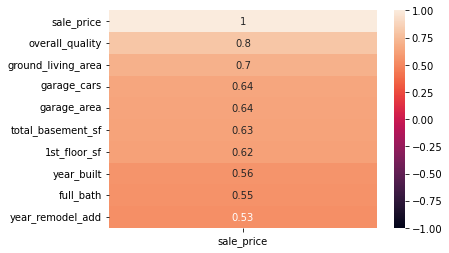

In [23]:
# Quick correlation check of numeric column - top 10 positively correlated

sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price',ascending=False).head(10),
            annot=True,
            vmin=-1,
            vmax=1);

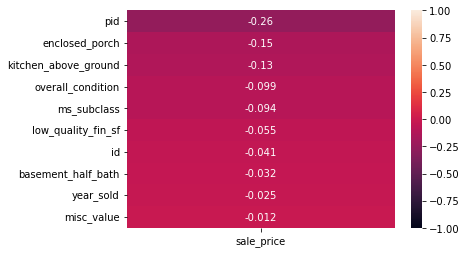

In [24]:
# Quick correlation check of numeric column - top 10 negatively correlated

sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price',ascending=True).head(10),
            annot=True,
            vmin=-1,
            vmax=1);

---

### Current Model 

In [72]:
features = ['lot_area','land_contour','overall_quality','ground_living_area','garage_area','total_basement_sf','1st_floor_sf','year_built','sale_price']

In [73]:
selected_df = df[features]

In [74]:
selected_df.fillna(0,inplace=True)

In [75]:
selected_df = pd.get_dummies(columns=['land_contour'], data = selected_df, drop_first=True)

In [76]:
#selected_df = pd.get_dummies(columns=['street'], data = selected_df, drop_first=True)

In [77]:
#selected_df = pd.get_dummies(columns=['lot_shape'], data = selected_df, drop_first=True)

In [78]:
X = selected_df.drop(columns=['sale_price'])
y = selected_df['sale_price']

In [79]:
lr = LinearRegression()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
# predict
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

# train test score
train_r2 = lr.score(X_train,y_train)
test_r2 = lr.score(X_test,y_test)

# cross validation score
mean_cross_val = cross_val_score(lr, X_train, y_train).mean()

# metrics (comparing y_preds with y)
rmse_train = round(metrics.mean_squared_error(y_train,y_train_preds,squared=False),2)
rmse_test = round(metrics.mean_squared_error(y_test,y_test_preds,squared=False),2)

print(" Baseline Model ".center(30, "="))
print(f"train r2: {train_r2.round(4)}")
print(f"test_r2: {test_r2.round(4)}")
print(f"mean cross val: {mean_cross_val.round(4)}")
print(f"train rmse: {rmse_train}")
print(f"test rmse: {rmse_test}")

======= Baseline Model =======
train r2: 0.7788
test_r2: 0.8284
mean cross val: 0.7564
train rmse: 37951.37
test rmse: 34343.99


---